In [1]:
import pandas as pd

def load_dataset():
    url = "iris.csv"
    dataset = pd.read_csv(url)
    return dataset

In [2]:
dataset = load_dataset()

In [3]:
def summarize_dataset(dataset):
    print('Dataset dimension:')
    print(dataset.shape)
    print('\nFirst 10 rows of dataset:')
    print(dataset.head(10))
    print('\nStatistical summary:')
    print(dataset.describe())
    print('\nClass Distribution:')
    print(dataset.groupby('class').size())

In [4]:
summarize_dataset(dataset)

Dataset dimension:
(150, 5)

First 10 rows of dataset:
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

Statistical summary:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.7586

In [5]:
from pandas import read_csv
from matplotlib import pyplot

def print_plot_univariate(dataset):
    dataset.hist(figsize=(20, 10), align='mid', color="#b9dbbb")
    pyplot.show()

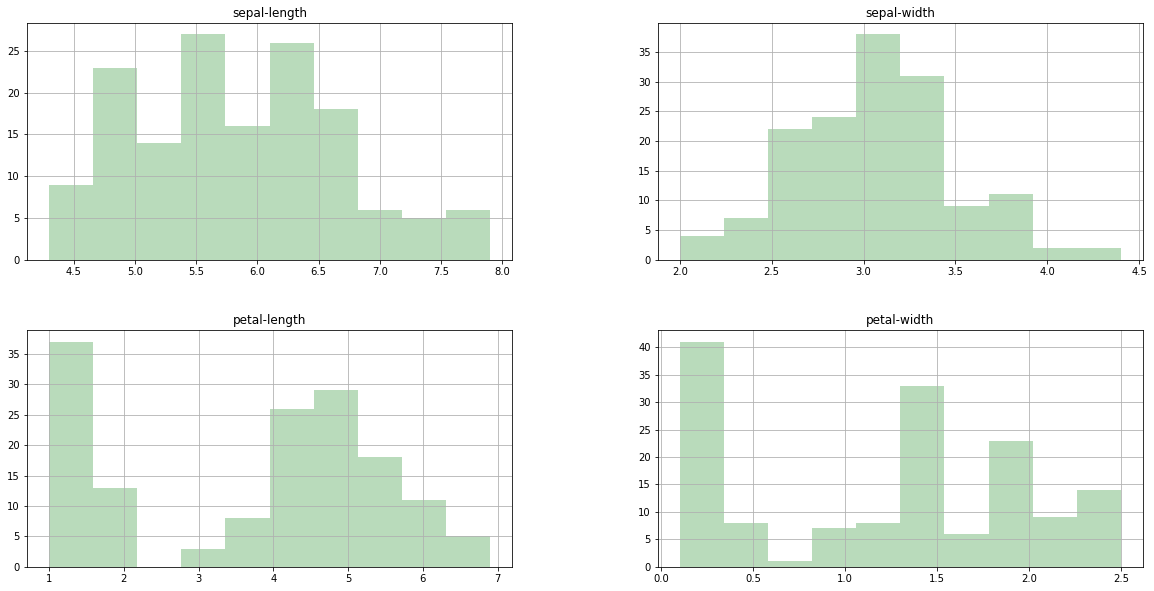

In [6]:
print_plot_univariate(dataset)

In [7]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

def print_plot_multivariate(dataset):
    colors = {'Iris-setosa':'#39603D', 'Iris-versicolor':'#007CC7', 'Iris-virginica':'#F1B24A'}
    scatter_matrix(dataset, figsize=(10, 7), color=dataset['class'].map(colors))
    pyplot.show()

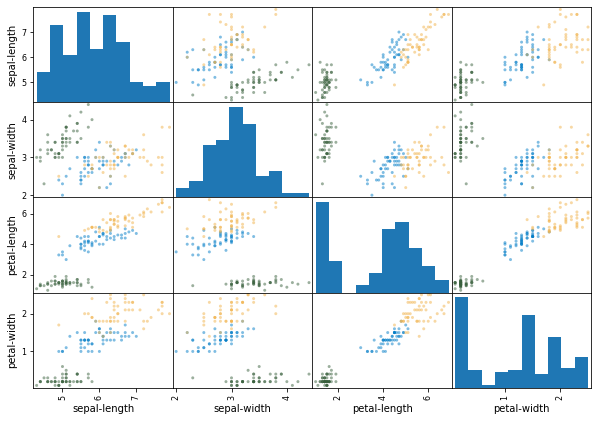

In [8]:
print_plot_multivariate(dataset)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
def my_print_and_test_models(dataset):
    array = dataset.values
    X = array[:, 0:4]
    y = array[:, 4]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
    
    model_name = 'DecisionTree'
    model = DecisionTreeClassifier()
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    model_name = 'GaussianNB'
    model = GaussianNB()
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    model_name = 'KNeighbors'
    model = KNeighborsClassifier()
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    model_name = 'LogisticRegression'
    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    model_name = 'LinearDiscriminant'
    model = LinearDiscriminantAnalysis()
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    model_name = 'SVM'
    model = SVC(gamma='auto')
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))
 

In [11]:
my_print_and_test_models(dataset)

DecisionTree: 0.941667 (0.075000)
GaussianNB: 0.950000 (0.055277)
KNeighbors: 0.958333 (0.041667)
LogisticRegression: 0.950000 (0.055277)
LinearDiscriminant: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)
